In [23]:
shhh <- suppressPackageStartupMessages

# A function to collect fundamental data from Yahoo finance (Income Statement, Balance Sheet and Cash Flow statements)

getFin <- function(stock){
  if ("rvest" %in% installed.packages()) {
    library(rvest)
    }else{
      install.packages("rvest")
      library(rvest)
      }
  for (i in 1:length(stock)) {
    tryCatch(
      {
        # Collect the Income Statement data
        link <- "https://finance.yahoo.com/quote/"
        link <- paste0(link, stock[i], "/financials?p=", stock[i])
        wahis.session <- html_session(link)
        p <- wahis.session %>%
          html_nodes(xpath = '//*[@id="Col1-1-Financials-Proxy"]/section/div[3]/table')%>%
          html_table(fill = TRUE)
        IncomeStatement <- p[[1]]
        colnames(IncomeStatement) <- paste(IncomeStatement[1,])
        IncomeStatement <- IncomeStatement[-c(1,5,12,20,25),]
        names_row <- paste(IncomeStatement[,1])
        IncomeStatement <- IncomeStatement[,-1]
        IncomeStatement <- apply(IncomeStatement, 2, function(x){gsub(",","",x)})
        IncomeStatement <- as.data.frame(apply(IncomeStatement, 2, as.numeric))
        rownames(IncomeStatement) <- paste(names_row)
        temp1 <- IncomeStatement
        
        # Collect the Balance Sheet data
        link <- "https://finance.yahoo.com/quote/"
        link <- paste0(link, stock[i],"/balance-sheet?p=", stock[i])
        wahis.session <- html_session(link)
        p <- wahis.session %>%
          html_nodes(xpath = '//*[@id="Col1-1-Financials-Proxy"]/section/div[3]/table')%>%
          html_table(fill = TRUE)
        BalanceSheet <- p[[1]]
        colnames(BalanceSheet) <- BalanceSheet[1,]
        BalanceSheet <- BalanceSheet[-c(1,2,17,28),]
        names_row <- BalanceSheet[,1]
        BalanceSheet <- BalanceSheet[,-1]
        BalanceSheet <- apply(BalanceSheet, 2, function(x){gsub(",","",x)})
        BalanceSheet <- as.data.frame(apply(BalanceSheet, 2, as.numeric))
        rownames(BalanceSheet) <- paste(names_row)
        temp2 <- BalanceSheet
        
        # Collect the Cash Flow data
        link <- "https://finance.yahoo.com/quote/"
        link <- paste0(link, stock[i], "/cash-flow?p=", stock[i])
        wahis.session <- html_session(link)
        p <- wahis.session %>%
          html_nodes(xpath = '//*[@id="Col1-1-Financials-Proxy"]/section/div[3]/table')%>%
          html_table(fill = TRUE)
        CashFlow <- p[[1]]
        colnames(CashFlow) <- CashFlow[1,]
        CashFlow <- CashFlow[-c(1,3,11,16),]
        names_row <- CashFlow[,1]
        CashFlow <- CashFlow[,-1]
        CashFlow <- apply(CashFlow, 2, function(x){gsub(",","",x)})
        CashFlow <- as.data.frame(apply(CashFlow, 2, as.numeric))
        rownames(CashFlow) <- paste(names_row)
        temp3 <- CashFlow
        
        assign(paste0(stock[i],'.f'),value = list(IncomeStatement = temp1, BalanceSheet = temp2, CashFlow = temp3), envir = parent.frame())
        },
      error = function(cond){
        message(stock[i], "Give error ",cond)
        }
      )
  }
}

In [18]:
# Select the tickers we wish to collect
symbols <- c("GOOG", "MSFT", "HOG")

# Apply the function
suppressWarnings(tryCatch(getFin(symbols)))

symbols.f <- sapply(symbols, function(x) { paste0(x, ".f") })

tickers <- list2env(mget(symbols.f))

IS <- lapply(tickers, "[[", "IncomeStatement")
BS <- lapply(tickers, "[[", "BalanceSheet")
CF <- lapply(tickers, "[[", "CashFlow")

IS <- as.data.frame(IS)
BS <- as.data.frame(BS)
CF <- as.data.frame(CF)

head(IS)
head(BS)
head(CF)

,HOG.f.12.31.2018,HOG.f.12.31.2017,HOG.f.12.31.2016,HOG.f.12.31.2015,MSFT.f.6.30.2019,MSFT.f.6.30.2018,MSFT.f.6.30.2017,MSFT.f.6.30.2016,GOOG.f.12.31.2018,GOOG.f.12.31.2017,GOOG.f.12.31.2016,GOOG.f.12.31.2015
Total Revenue,5716875,5647224,5996458,5995402,125843000,110360000,96571000,91154000,136819000,110855000,90272000,74989000
Cost of Revenue,3803576,3739199,3885527,3772841,42910000,38353000,34261000,32780000,59549000,45583000,35138000,28164000
Gross Profit,1913299,1908025,2110931,2222561,82933000,72007000,62310000,58374000,77270000,65272000,55134000,46825000
Research Development,NA,NA,NA,NA,16876000,14726000,13037000,11988000,21419000,16625000,13948000,12282000
Selling General and Administrative,1090436,1016761,1061995,1040266,23098000,22223000,19942000,19198000,24459000,19765000,17470000,15183000
Non Recurring,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


,HOG.f.12.31.2018,HOG.f.12.31.2017,HOG.f.12.31.2016,HOG.f.12.31.2015,MSFT.f.6.30.2019,MSFT.f.6.30.2018,MSFT.f.6.30.2017,MSFT.f.6.30.2016,GOOG.f.12.31.2018,GOOG.f.12.31.2017,GOOG.f.12.31.2016,GOOG.f.12.31.2015
Cash And Cash Equivalents,544548,338186,425540,400443,11356000,11946000,7663000,6510000,16701000,10715000,12918000,15409000
Short Term Investments,10007,NA,5519,45192,122476000,121718000,125238000,106531000,92439000,91156000,73415000,56517000
Net Receivables,306474,329986,285106,247405,29524000,26481000,22431000,18277000,21193000,18705000,15632000,13459000
Inventory,556128,538202,499917,585907,2063000,2662000,2181000,2251000,1107000,749000,268000,491000
Other Current Assets,124168,156253,155191,171171,10133000,6855000,5183000,6091000,4236000,2983000,3175000,1590000
Total Current Assets,4484442,3884742,3853852,3977883,175552000,169662000,162696000,139660000,135676000,124308000,105408000,90114000


,HOG.f.12.31.2018,HOG.f.12.31.2017,HOG.f.12.31.2016,HOG.f.12.31.2015,MSFT.f.6.30.2019,MSFT.f.6.30.2018,MSFT.f.6.30.2017,MSFT.f.6.30.2016,GOOG.f.12.31.2018,GOOG.f.12.31.2017,GOOG.f.12.31.2016,GOOG.f.12.31.2015
Net Income,531451,521759,692164,752207,39240000,16571000,25489000,20539000,30736000,12662000,19478000,16348000
Depreciation,230209,222188,209555,198074,11600000,9900000,7800000,5878000,9029000,6899000,6100000,5024000
Adjustments To Net Income,150035,226144,131961,54670,-2521000,-3054000,1342000,6229000,3298000,8284000,7158000,5609000
Changes In Accounts Receivables,9143,-18149,-45934,-13665,-2812000,-3862000,-1216000,562000,-2169000,-3768000,-2578000,-2094000
Changes In Liabilities,196192,10128,38237,138823,4694000,7070000,3901000,2653000,1438000,1121000,333000,246000
Changes In Inventories,-31059,-20584,85072,-155222,597000,-465000,50000,600000,NA,NA,NA,NA


In [19]:
# Clean the data up a little bit
ISBSCF <- rbind(IS, BS, CF)

library(tibble)
library(tidyr)

ISBSCF <- ISBSCF %>%
  t() %>%
  data.frame() %>%
  rownames_to_column('rn') %>%
  separate(rn, into = c("symbol", "year"),
           sep = -4, convert = TRUE)


ISBSCF$symbol <- gsub("(f).*", "", ISBSCF$symbol)
ISBSCF$symbol <- gsub('.$', '', ISBSCF$symbol)
ISBSCF$symbol <- gsub('^X', '', ISBSCF$symbol)

head(ISBSCF)

symbol,year,Total.Revenue,Cost.of.Revenue,Gross.Profit,Research.Development,Selling.General.and.Administrative,Non.Recurring,Others,Total.Operating.Expenses,...,Investments,Other.Cash.flows.from.Investing.Activities,Total.Cash.Flows.From.Investing.Activities,Dividends.Paid,Sale.Purchase.of.Stock,Net.Borrowings,Other.Cash.Flows.from.Financing.Activities,Total.Cash.Flows.From.Financing.Activities,Effect.Of.Exchange.Rate.Changes,Change.In.Cash.and.Cash.Equivalents
HOG,2018,5716875,3803576,1913299,NA,1090436,NA,NA,4894012,...,-10007,-11598,-662269,-245810,NA,618128,NA,-14763,-15351,513538
HOG,2017,5647224,3739199,1908025,NA,1016761,NA,NA,4755960,...,6916,547,-562468,-251862,NA,155511,8458,-550261,26747,-80921
HOG,2016,5996458,3885527,2110931,NA,1061995,NA,NA,4947522,...,40014,411,-392731,-252321,NA,-78256,2251,-777885,-9443,-5720
HOG,2015,5995402,3772841,2222561,NA,1040266,NA,NA,4813107,...,11507,7474,-915848,-249262,NA,1397161,14878,-354064,-14677,-184471
MSFT,2019,125843000,42910000,82933000,16876000,23098000,NA,NA,82884000,...,540000,NA,-15773000,-13811000,NA,-4000000,-675000,-36887000,-115000,-590000
MSFT,2018,110360000,38353000,72007000,14726000,22223000,NA,NA,75302000,...,6557000,-98000,-6061000,-12699000,NA,-10201000,-971000,-33590000,50000,4283000


In [20]:
############################## Get stats data ##################################
library(quantmod)
metrics <- yahooQF(c("Name", "Enterprise Value", "Enterprise Value/Revenue", "Enterprise Value/EBITDA",
                     "Total Cash Per Share (mrq)", "EBITDA", "Volume", "P/E Ratio", "Dividend Yield", "Shares Outstanding", "Price/Book"))

stats <- getQuote(symbols, what = metrics) %>%
  rownames_to_column("symbol")

colnames(stats) <- gsub(" ", ".", colnames(stats))
colnames(stats) <- gsub("/", ".", colnames(stats))

head(stats)
#################################################################################

symbol,Trade.Time,Name,Volume,P.E.Ratio,Dividend.Yield,Shares.Outstanding,Price.Book
GOOG,2019-08-23 16:00:01,Alphabet Inc.,1688271,23.24195,NA,348264000,4.157572
MSFT,2019-08-23 16:00:01,Microsoft Corporation,32523998,26.36166,0.01335462,7662819840,9.962656
HOG,2019-08-23 16:02:58,"Harley-Davidson, Inc.",1849495,11.37356,0.04660619,159072992,2.489465


In [24]:
############################## Get latest stock price data ######################
shhh(library(tidyquant))
stocks <- symbols %>%
  tq_get(get = "stock.prices",
         from =  Sys.Date(),
         to =  Sys.Date()) %>%
  select(symbol, date, adjusted)

head(stocks)
#################################################################################

symbol,date,adjusted
GOOG,2019-08-23,1151.29
MSFT,2019-08-23,133.39
HOG,2019-08-23,30.72


In [27]:
############################## Join all 3 datasets together ######################
financials <- ISBSCF %>%
  filter(year == 2018) %>%
  inner_join(stats, by = "symbol") %>%
  inner_join(stocks, by = "symbol")

head(financials)
#################################################################################

symbol,year,Total.Revenue,Cost.of.Revenue,Gross.Profit,Research.Development,Selling.General.and.Administrative,Non.Recurring,Others,Total.Operating.Expenses,...,Change.In.Cash.and.Cash.Equivalents,Trade.Time,Name,Volume,P.E.Ratio,Dividend.Yield,Shares.Outstanding,Price.Book,date,adjusted
HOG,2018,5716875,3803576,1913299,NA,1090436,NA,NA,4894012,...,513538,2019-08-23 16:02:58,"Harley-Davidson, Inc.",1849495,11.37356,0.04660619,159072992,2.489465,2019-08-23,30.72
MSFT,2018,110360000,38353000,72007000,14726000,22223000,NA,NA,75302000,...,4283000,2019-08-23 16:00:01,Microsoft Corporation,32523998,26.36166,0.01335462,7662819840,9.962656,2019-08-23,133.39
GOOG,2018,136819000,59549000,77270000,21419000,24459000,NA,NA,105427000,...,5986000,2019-08-23 16:00:01,Alphabet Inc.,1688271,23.24195,NA,348264000,4.157572,2019-08-23,1151.29


In [35]:
############################## Create some financial ratios ######################

financials %>%
  mutate(BvE = Total.Assets - Total.Liabilities,
         BvE_per_share = BvE / (Shares.Outstanding / 1000),
         EBITDA = Earnings.Before.Interest.and.Taxes + Depreciation,
         Market_Cap = adjusted * (Shares.Outstanding / 1000),                 #¡Cuidado!
         EV = (Market_Cap + Total.Liabilities) - Cash.And.Cash.Equivalents,
         Mkt_Book = EV /(Total.Assets - Cash.And.Cash.Equivalents),
         Price_Book = Market_Cap / Total.stockholders..equity,
         Price_Sales = Market_Cap / Total.Revenue,
         PE_Ratio = Market_Cap / Net.Income,
         EV_EBITDA =  EV / EBITDA,
         NI_REV = Net.Income / Total.Revenue,
         Rev_TA = Total.Revenue / Total.Assets,
         TA_BvE = Total.Assets / BvE,
         ROE = NI_REV * Rev_TA * TA_BvE * 100) %>%
  select(symbol, date, BvE, BvE_per_share, EBITDA, Market_Cap, EV, Mkt_Book, Price_Book, Price_Sales,
         PE_Ratio, EV_EBITDA, NI_REV, Rev_TA, TA_BvE, ROE)
#################################################################################

symbol,date,BvE,BvE_per_share,EBITDA,Market_Cap,EV,Mkt_Book,Price_Book,Price_Sales,PE_Ratio,EV_EBITDA,NI_REV,Rev_TA,TA_BvE,ROE
HOG,2019-08-23,1773949,11.15179,1053072,4886722,13233889,1.307552,2.754714,0.8547891,9.195057,12.56694,0.0929618,0.5360074,6.012385,29.95864
MSFT,2019-08-23,82718000,10.79472,44958000,1022143531,1186327531,4.804852,12.356966,9.2619022,61.682670,26.38746,0.1501540,0.4263506,3.129283,20.03312
GOOG,2019-08-23,177628000,510.03836,40421000,400952874,439415874,2.033476,2.257262,2.9305350,13.045057,10.87098,0.2246472,0.5877307,1.310559,17.30358


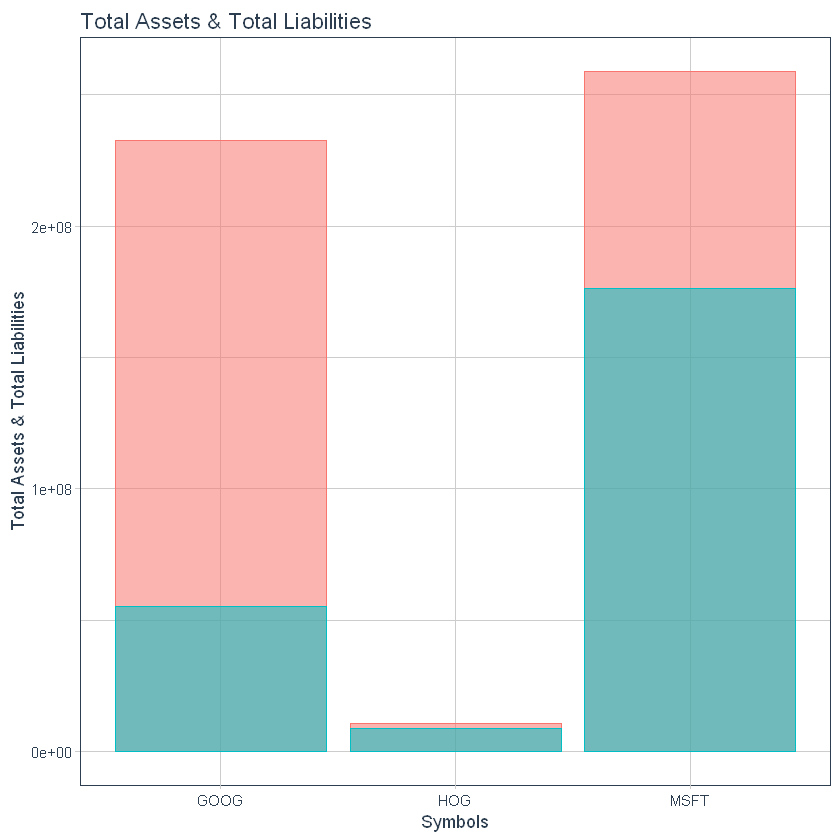

In [34]:
financials %>%
  ggplot(aes(x = symbol)) +
  geom_col(aes(y = Total.Assets, color = "blue", fill = "blue", alpha = 0.5)) +
  geom_col(aes(y = Total.Liabilities, color = "red", fill = "red", alpha = 0.5)) +
  ggtitle("Total Assets & Total Liabilities") +
  xlab("Symbols") +
  ylab("Total Assets & Total Liabilities") +
  theme_tq() +
  theme(legend.position = "none")